<a href="https://colab.research.google.com/github/amansandhu408/deep-learning/blob/main/Generative_Adversarial_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

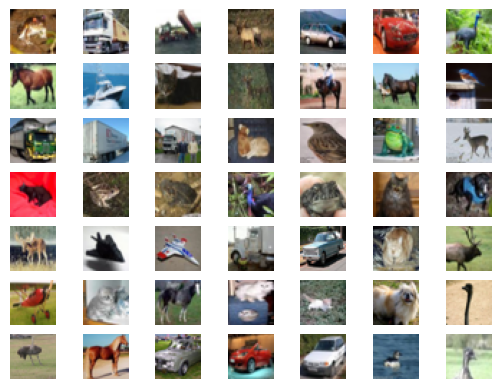

In [ ]:
from tensorflow.keras.datasets.cifar10 import load_data
from matplotlib import pyplot
#load the image to memory
(trainX, trainy),(testX,testy) = load_data()

#plot images from training data
for i in range(49):
  #define subplot
  pyplot.subplot(7,7,1+i)
  #turn off the axis
  pyplot.axis('off')
  #plot raw pixel data
  pyplot.imshow(trainX[i])
pyplot.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Input, Conv2D, Flatten, Dropout, LeakyReLU
from tensorflow.keras.utils import plot_model
import numpy as np

In [ ]:
# define the standalone discriminator model
def define_discriminator(in_shape=(32, 32, 3)):
    model = Sequential(name="discriminator")

    model.add(Input(shape=in_shape))

    # normal
    model.add(Conv2D(64, (3,3), padding='same'))
    model.add(LeakyReLU(negative_slope=0.2))

    # downsample
    model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(negative_slope=0.2))

    # downsample
    model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(negative_slope=0.2))

    # downsample
    model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(negative_slope=0.2))

    # classifier
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))

    # compile
    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(
        loss='binary_crossentropy',
        optimizer=opt,
        metrics=['accuracy']
    )

    return model

Model: "discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_16 (LeakyReLU)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_17 (LeakyReLU)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_18 (LeakyReLU)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_19 (LeakyReLU)      │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 372,865 (1.42 MB)

 Trainable params: 372,865 (1.42 MB)

 Non-trainable params: 0 (0.00 B)

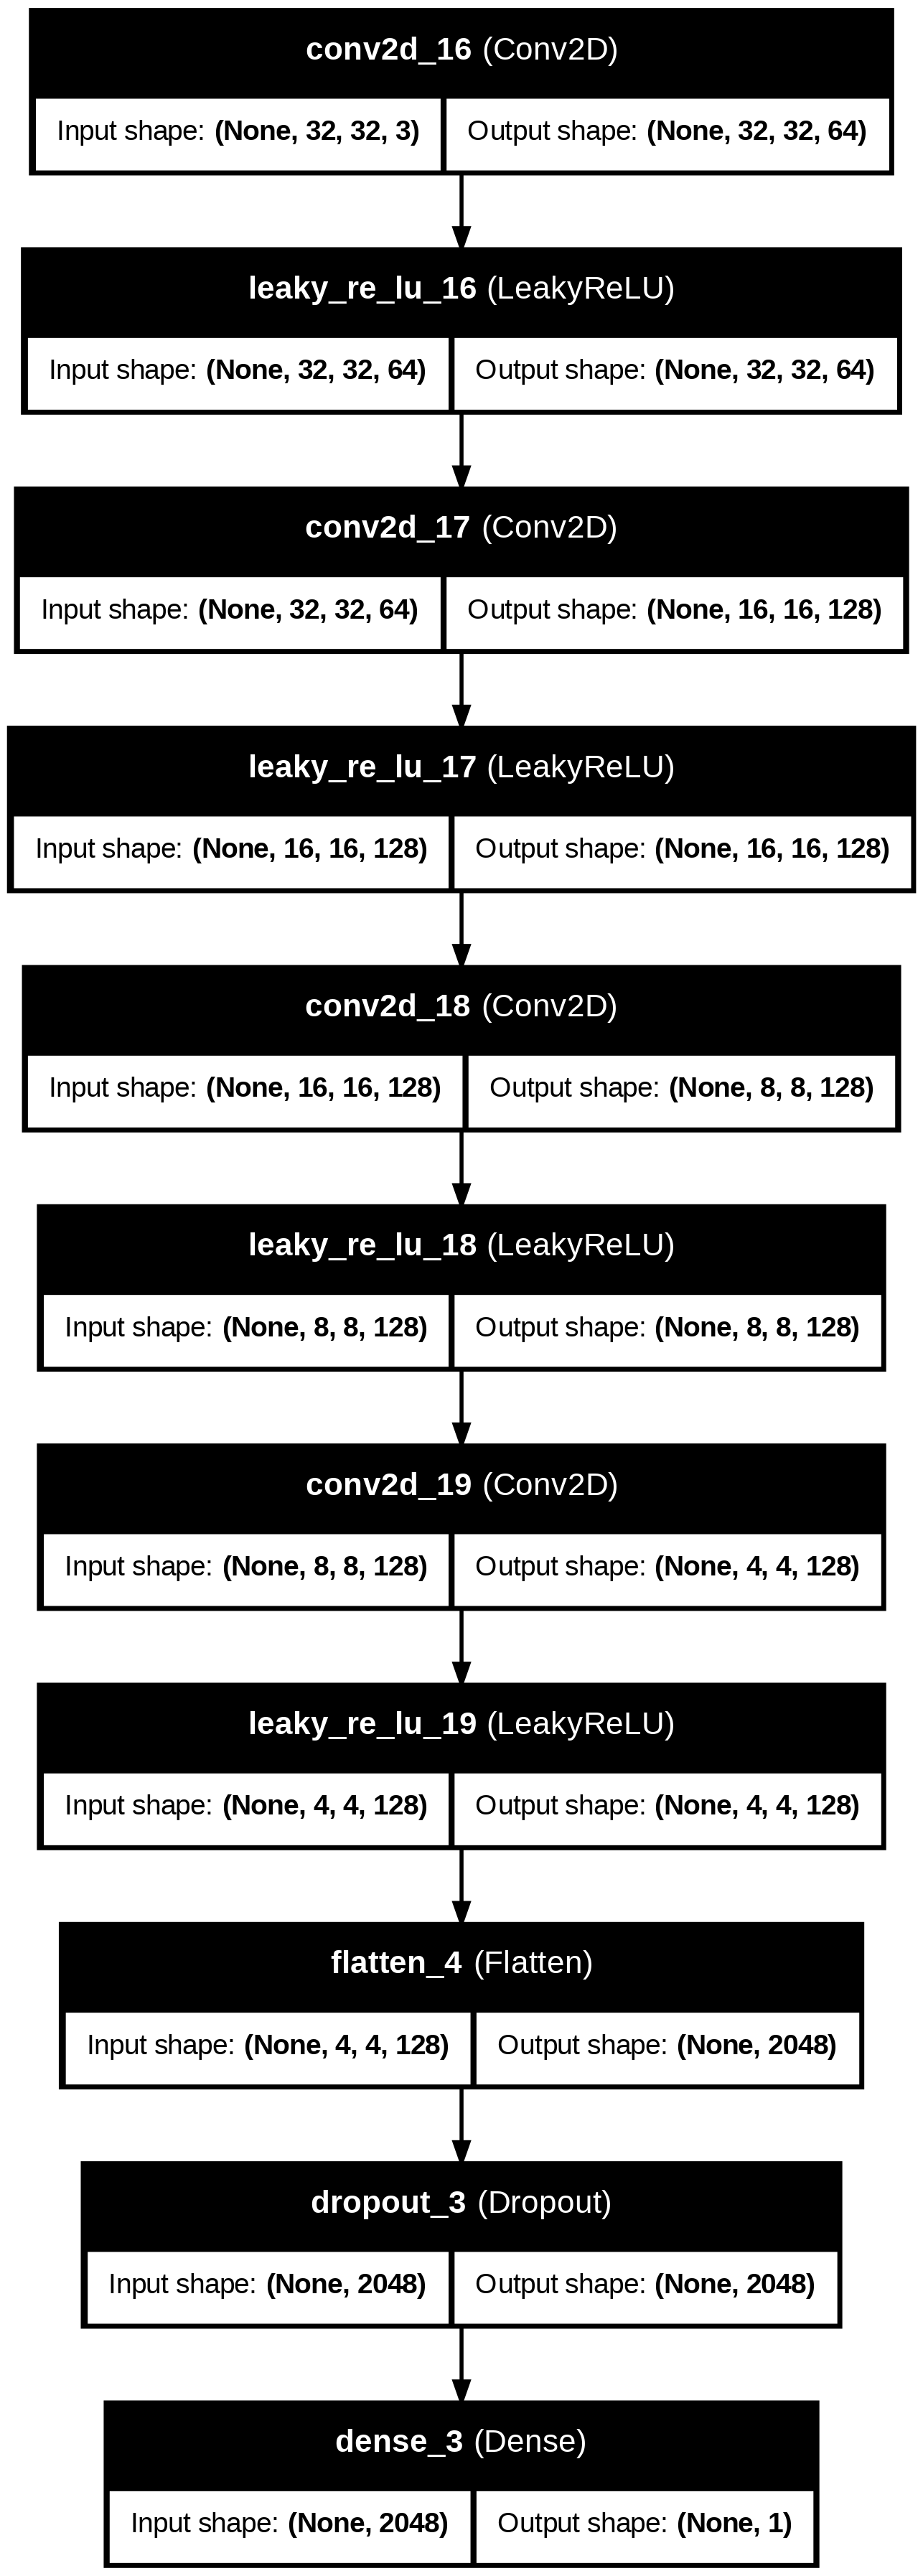

In [ ]:
# define model
model = define_discriminator()

# summary
model.summary()

# plot model
plot_model(
    model,
    to_file='discriminator_plot.png',
    show_shapes=True,
    show_layer_names=True
)

In [ ]:
#function to load the dataset and scale it
#load and prepare cifar10 training images

def load_real_sample():
  # load cifar10 dataset
  (trainX, _),(_, _) = load_data()
  #convert from unsigned images to floats
  X= trainX.astype('float32')
  #scale from [0,255] to [-1,1]
  X= (X-127.5)/127.5
  return X

# load data
X = load_real_sample()

In [ ]:
X.shape

(50000, 32, 32, 3)

In [ ]:
#select real samples
def generate_real_samples(dataset, n_samples):
  #choose random instances
  ix = np.random.randint(0, dataset.shape[0],n_samples)
  # retrieve selected images
  X = dataset[ix]
  #generate_real class label (1)
  y = np.ones((n_samples, 1))
  return X,y

In [ ]:
X, y = generate_real_samples(X,64)
print(X.shape)
print(y.shape)
print(y)

(64, 32, 32, 3)
(64, 1)
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [ ]:
# generate n fake samples with class labels
def generate_fake_samples(n_samples):
  #generate uniform random number in [0,1]
  X= np.random.rand(32*32*3*n_samples)
  #update to have the range [-1,1]
  X= -1+X*2
  #reshape into a batch of the color images
  X = X.reshape((n_samples,32,32,3))
  #generate 'fake' class labels (0)
  y = np.zeros((n_samples, 1))
  return X,y

In [ ]:
X, y = generate_fake_samples(64)
print(X.shape)
print(y.shape)
print(y)

(64, 32, 32, 3)
(64, 1)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


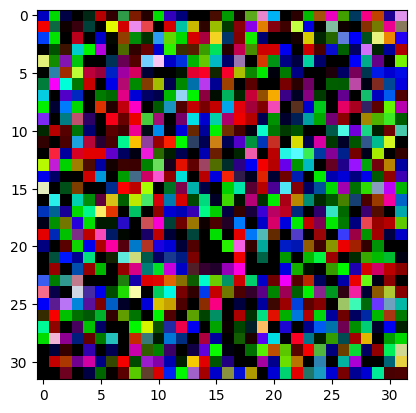

In [ ]:
pyplot.imshow(X[0])

In [ ]:
# train the discriminator model temporarily

def train_discriminator(model,dataset,n_iter=50, n_batch=120):
  half_batch=int(n_batch/2)
  #manually enumerate epochs
  for i in range(n_iter):
    #get randomly selected 'real' sample
    X_real, y_real = generate_real_samples(dataset,half_batch)

    #update discriminator on real samples
    _, real_acc = model.train_on_batch(X_real,y_real)

    #generate 'fake' sample
    X_fake, y_fake = generate_fake_samples(half_batch)

    #update discriminator on fake samples
    _, fake_acc = model.train_on_batch(X_fake ,y_fake)

    #summarize performance
    print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100,fake_acc*100))



In [ ]:
# example training

#define the discriminator model
model=define_discriminator()
#load image
dataset = load_real_sample()
#fit the model
train_discriminator(model,dataset)

>1 real=27% fake=16%
>2 real=37% fake=34%
>3 real=44% fake=46%
>4 real=50% fake=53%
>5 real=56% fake=60%
>6 real=62% fake=65%
>7 real=65% fake=68%
>8 real=68% fake=70%
>9 real=71% fake=72%
>10 real=73% fake=74%
>11 real=75% fake=76%
>12 real=77% fake=78%
>13 real=79% fake=80%
>14 real=80% fake=81%
>15 real=81% fake=82%
>16 real=83% fake=83%
>17 real=84% fake=84%
>18 real=84% fake=85%
>19 real=85% fake=86%
>20 real=86% fake=86%
>21 real=87% fake=87%
>22 real=87% fake=88%
>23 real=88% fake=88%
>24 real=88% fake=89%
>25 real=89% fake=89%
>26 real=89% fake=90%
>27 real=90% fake=90%
>28 real=90% fake=90%
>29 real=90% fake=91%
>30 real=91% fake=91%
>31 real=91% fake=91%
>32 real=91% fake=91%
>33 real=92% fake=92%
>34 real=92% fake=92%
>35 real=92% fake=92%
>36 real=92% fake=92%
>37 real=92% fake=93%
>38 real=93% fake=93%
>39 real=93% fake=93%
>40 real=93% fake=93%
>41 real=93% fake=93%
>42 real=93% fake=93%
>43 real=94% fake=94%
>44 real=94% fake=94%
>45 real=94% fake=94%
>46 real=94% fake=9

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Conv2DTranspose, BatchNormalization, LeakyReLU, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

In [ ]:
def define_generator(latent_dim):
    model = Sequential(name="generator")

    # foundation for 4x4 images
    n_nodes = 256 * 4 * 4
    model.add(Dense(n_nodes, input_dim=latent_dim))
    model.add(LeakyReLU(negative_slope=0.2))
    model.add(Reshape((4, 4, 256)))

    # upsample to 8x8
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(negative_slope=0.2))

    # upsample to 16x16
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(negative_slope=0.2))

    # upsample to 32x32
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(negative_slope=0.2))

    # output layer: 32x32x3
    model.add(Conv2D(3, (3,3), activation='tanh', padding='same'))

    return model

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 4096)           │       413,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_44 (LeakyReLU)      │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 8, 8, 128)      │       524,416 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_45 (LeakyReLU)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 16, 16, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_46 (LeakyReLU)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 32, 32, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_47 (LeakyReLU)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 32, 32, 3)      │         3,459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,466,115 (5.59 MB)

 Trainable params: 1,466,115 (5.59 MB)

 Non-trainable params: 0 (0.00 B)

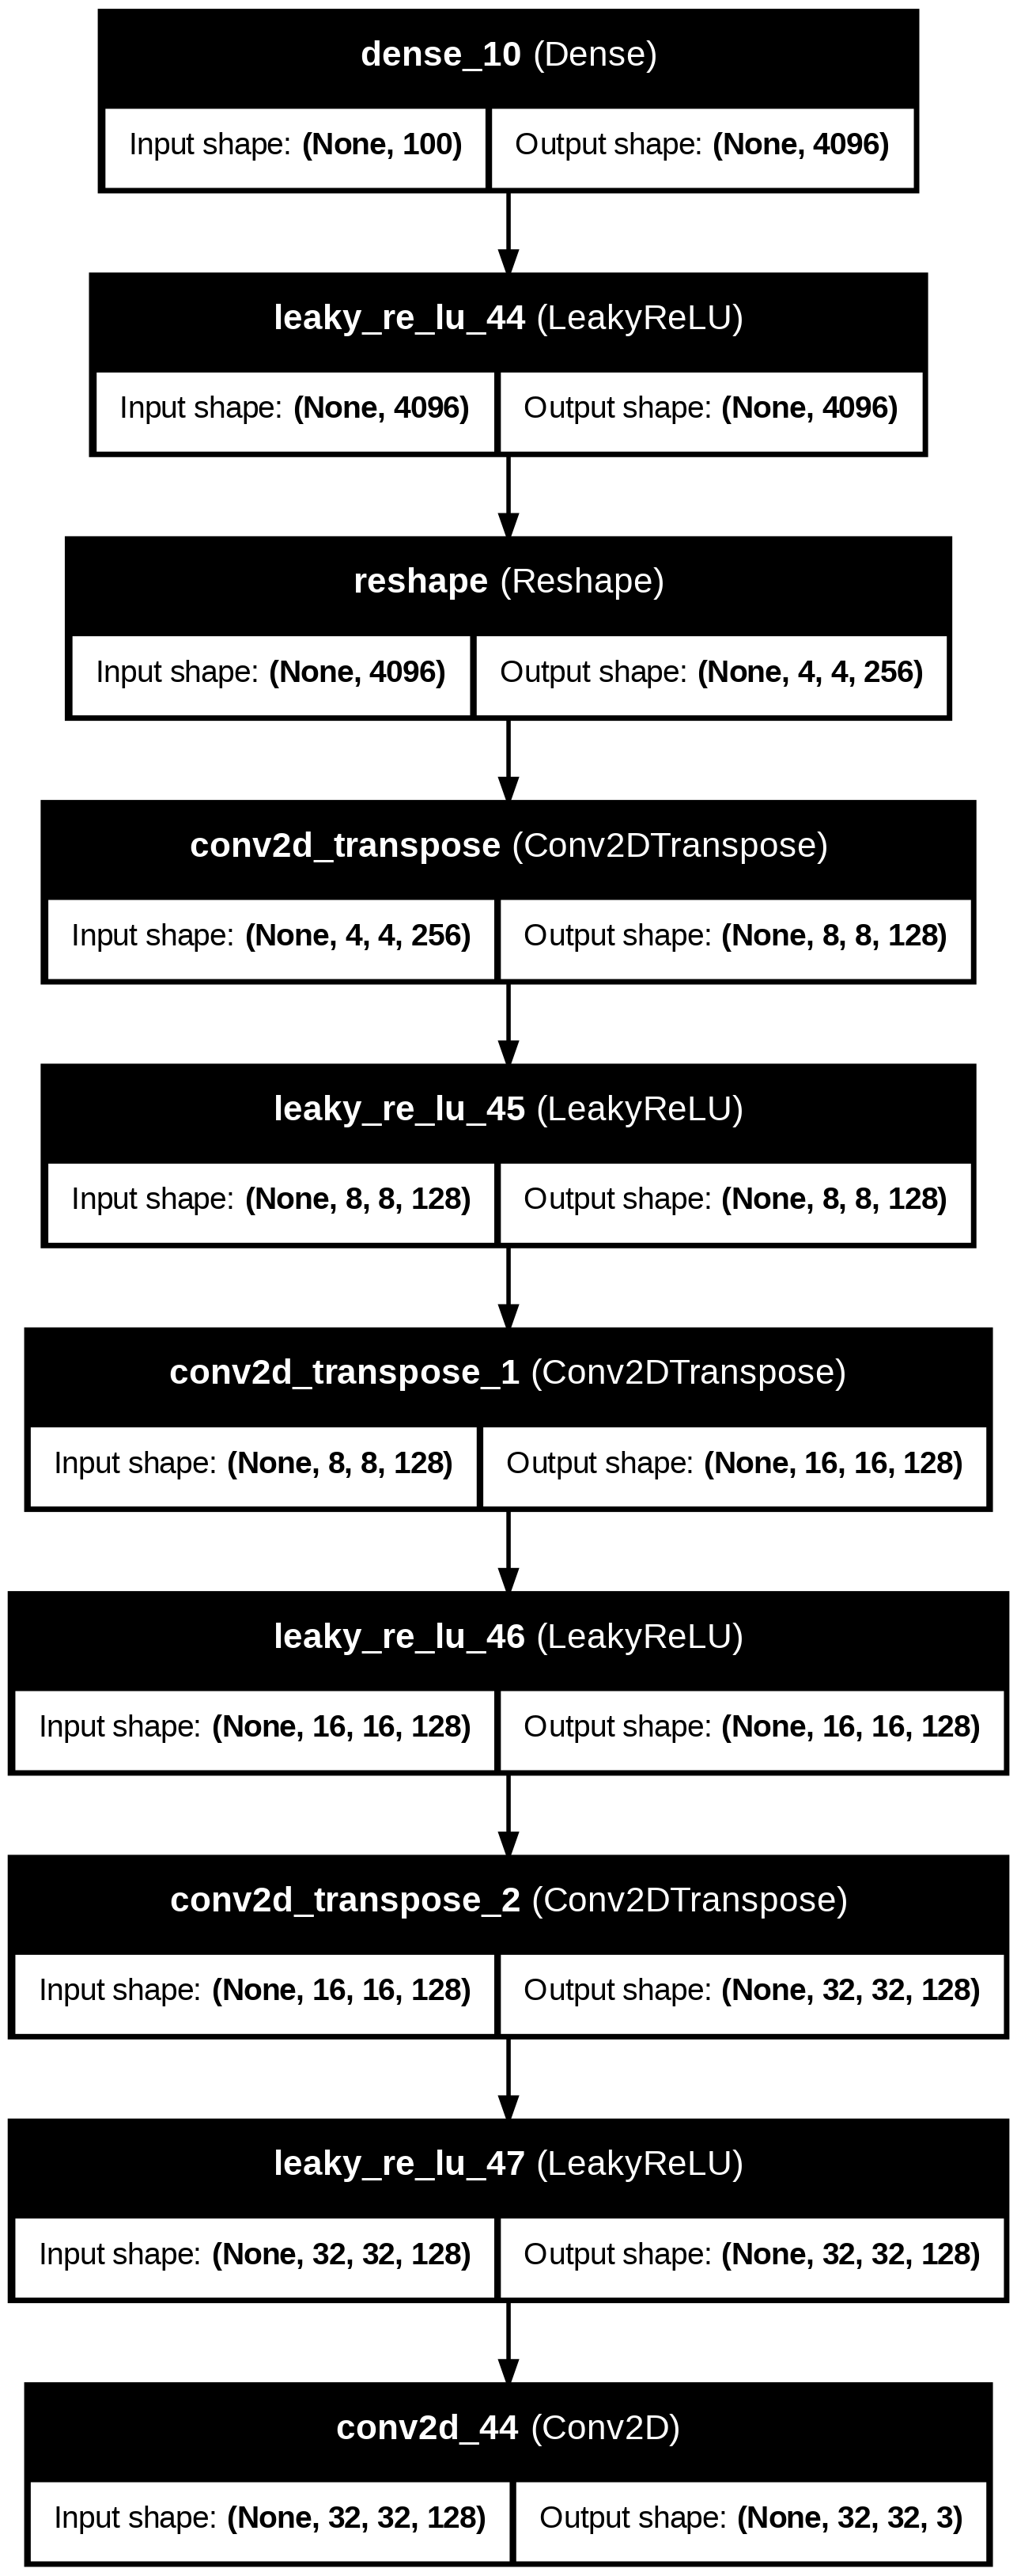

In [ ]:
# define the size of the latent space
latent_dim=100

#define the generator model
model = define_generator(latent_dim)

#summary
model.summary()
#plot the model
plot_model(model,to_file='generator_plot.png',show_shapes=True,show_layer_names=True)

In [ ]:
#generate points in the latent space as input for the generators
def generate_latent_points(latent_dim, n_samples):
  #generate points in the latent space
  x_input = np.random.randn(latent_dim * n_samples)

  #reshape into a batch of inputs for the networks
  x_input = x_input.reshape(n_samples,latent_dim)
  return x_input

In [ ]:

x_input = generate_latent_points(100,64)
print(x_input.shape)

(64, 100)


In [ ]:
#use the generator n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
  #generate points in the latent space
  x_input = generate_latent_points(latent_dim, n_samples)

  #predict outputs
  X= g_model.predict(x_input)

  #create 'fake' class labels(0)
  y = np.zeros((n_samples,1))
  return X,y

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 399ms/step


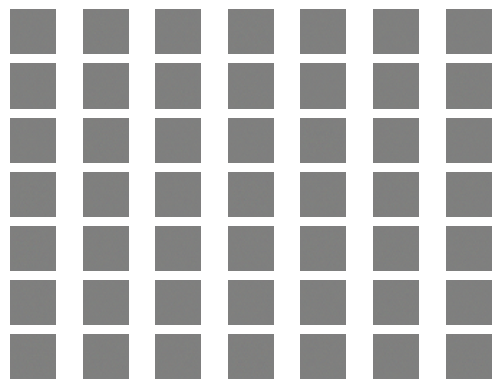

In [ ]:
# size of the latent space
latent_dim =100

#define the discriminator model
model= define_generator(latent_dim)

#generate samples
n_samples=49
X,_ = generate_fake_samples(model, latent_dim, n_samples)
#scale pixel values from [-1,1] to [0,1]
X= (X +1)/2.0

#plot the generated samples
for i in range(n_samples):
  #define subplot
  pyplot.subplot(7,7,1+i)
  #turn off axis labels
  pyplot.axis('off')
  #plot single image
  pyplot.imshow(X[i])

#show the figure
pyplot.show()

In [ ]:
 # define the combined generator and discriminator model, for updating the generator

 def define_gan(g_model,d_model):

  #make weights in the discriminator not trainable
  d_model.trainable = False

  #connect them
  model =Sequential()

  #add generator
  model.add(g_model)

  #add discriminator
  model.add(d_model)

  #compile model
  opt = Adam(learning_rate=0.0002, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt)
  return model

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ generator (Sequential)          │ (None, 32, 32, 3)      │     1,466,115 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ discriminator (Sequential)      │ (None, 1)              │       372,865 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,838,980 (7.02 MB)

 Trainable params: 1,466,115 (5.59 MB)

 Non-trainable params: 372,865 (1.42 MB)

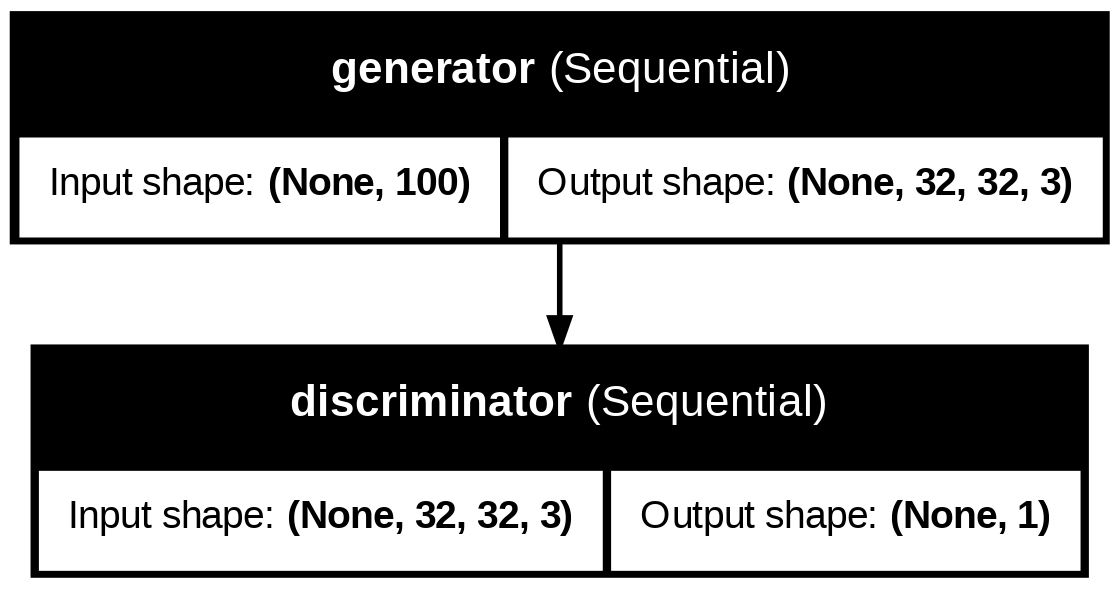

In [ ]:
#size of the latent space
latent_dim= 100

#create the discriminator
d_model=define_discriminator()

#create the generator
g_model=define_generator(latent_dim)

#create the GAN
gan_model=define_gan(g_model,d_model)

#summary GAN
gan_model.summary()

#plot GAN model
plot_model(gan_model,to_file='gan_plot.png',show_shapes=True,show_layer_names=True)

In [ ]:
# training the generator and discriminator
def train(g_model, d_model, gan_model, dataset,
              latent_dim, n_epochs=200, n_batch=128):

    bat_per_epo = int(dataset.shape[0]/ n_batch)
    half_batch = int(n_batch/ 2)

    #manually enumerate epochs
    for i in range(n_epochs):
      # enumerate batches over training set
        for j in range(bat_per_epo):
          #get randomly selected model weights
          X_real, y_real = generate_real_samples(dataset, half_batch)

          #update discriminator model weight
          d_loss1, _ = d_model.train_on_batch(X_real, y_real)

          # generate 'fake' examples
          X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)

          #update discriminator model weight
          d_loss2 , _ = d_model.train_on_batch(X_fake, y_fake)

          #prepare points in the latent space as input for the generator
          X_gan = generate_latent_points(latent_dim, n_batch)

          #create inverted labels for the fake samples
          y_gan = np.ones((n_batch, 1))  # want discriminator to output 1

          #update the generator via the discriminator's error
          g_loss = gan_model.train_on_batch(X_gan, y_gan)

          # Epoch summary
          print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f'
      % (i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))

        #evaluate the model performance , sometimes
        if(i+1) % 10 == 0:
          summarize_performance(i, g_model, d_model, dataset, latent_dim)

In [ ]:
# evaluate the discriminator , plot generated images, save generator model
def summarize_performance(epoch,g_model,d_model,dataset,latent_dim,n_samples=150):
  #prepare real samples
  X_real, y_real = generate_real_samples(dataset, n_samples)

  #evaluate discriminator model weight
  _, acc_real1 = d_model.evaluate(X_real, y_real)

  # generate 'fake' examples
  X_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)

  #evaluate discriminator model weight
  _, acc_fake = d_model.evaluate(X_fake, y_fake)

  #summarize
  print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real1*100, acc_fake*100))

  #save plot
  save_plot(X_fake,epoch)

  #save the generator model title file
  filename = 'generator_model_%03d.h5' % (epoch+1)
  g_model.save(filename)

In [ ]:
#create and save a plot of generated inmages
def save_plot(examples,epoch,n=7):
  #scale [-1,1] to [0,1]
  examples = (examples +1 )/ 2.0

  #plot images
  for i in range(n*n):
    # define subplot
    pyplot.subplot(n,n,1+i)
    #turn off axis
    pyplot.axis('off')
    # plot raw pixel data
    pyplot.imshow(examples[i])

  #save plot to file
  filename = 'generated_plot.png'% (epoch+1)
  pyplot.savefig(filename)
  pyplot.close()

In [ ]:
train(g_model, d_model, gan_model, dataset,
              latent_dim, n_epochs=200, n_batch=128)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
>1, 1/390, d1=0.702, d2=0.700 g=0.693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
>1, 2/390, d1=0.701, d2=0.700 g=0.692
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
>1, 3/390, d1=0.701, d2=0.701 g=0.692
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
>1, 4/390, d1=0.702, d2=0.701 g=0.691
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
>1, 5/390, d1=0.702, d2=0.702 g=0.690
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
>1, 6/390, d1=0.702, d2=0.703 g=0.688
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
>1, 7/390, d1=0.703, d2=0.704 g=0.686
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
>1, 8/390, d1=0.704, d2=0.705 g=0.684
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
>1, 9/390, d1=0.705, d2=0.707 g=0.680
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
>1, 10/390, d1=0.707, d2=0.709 g=0.676
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
>1, 11/390, d1=0.709, d2=0.712 g=0.671
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
>1, 12/390, d1=0.712, d2=0.715 g=0.664
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
>1, 13/390, d1=0.715, d2=0.719 g=0.658
2/2 ━━━━

KeyboardInterrupt: 